# Exploring Correlations between Domain Name Features and Ranking

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
plt.style.use('seaborn-whitegrid')

In [8]:
SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## Alexa 1M Ranking Data Set

- One file per day (~ 10 MBytes per file compressed)
- Data starts from 15th January 2016 and 18th December 2017 (703 days)
- But we only have 675 files (6.3 GBytes) since the crawler failed
- Format of each file:

```
1,google.com
2,youtube.com
3,facebook.com
4,baidu.com
5,wikipedia.org
6,yahoo.com
7,google.co.in
8,reddit.com
9,qq.com
10,amazon.com
...
999992,etvshop.ir
999993,devel.cz
999994,houseofcontrol.no
999995,rosarychurchqatar.com
999996,paintmarker.nl
999997,pictime-groupe.com
999998,delices-du-monde.fr
999999,catpapattes.com
1000000,pfizer.co.kr

```

## Aggregate

In this notebook, we are only interested in the domain names so we [aggregate the data](https://github.com/sheikhomar/mako/blob/master/src/data/spark/aggregate_rankings.py) to compute average ranks for each domain.

In [9]:
# TODO: Plot the data

## Distribution

To get a sense of how the data set, let us [group domains by length](https://github.com/sheikhomar/mako/blob/master/src/data/spark/domain_length.py) and plot the distribution.

In [10]:
data_path = '../data/external/domain-len-dist.csv'
df_domain_len_dist = pd.read_csv(data_path, names=['domain_length', 'count'])
df_domain_len_dist.head()

,domain_length,count
0,4,156
1,6,29931
2,8,118880
3,10,291937
4,12,360731


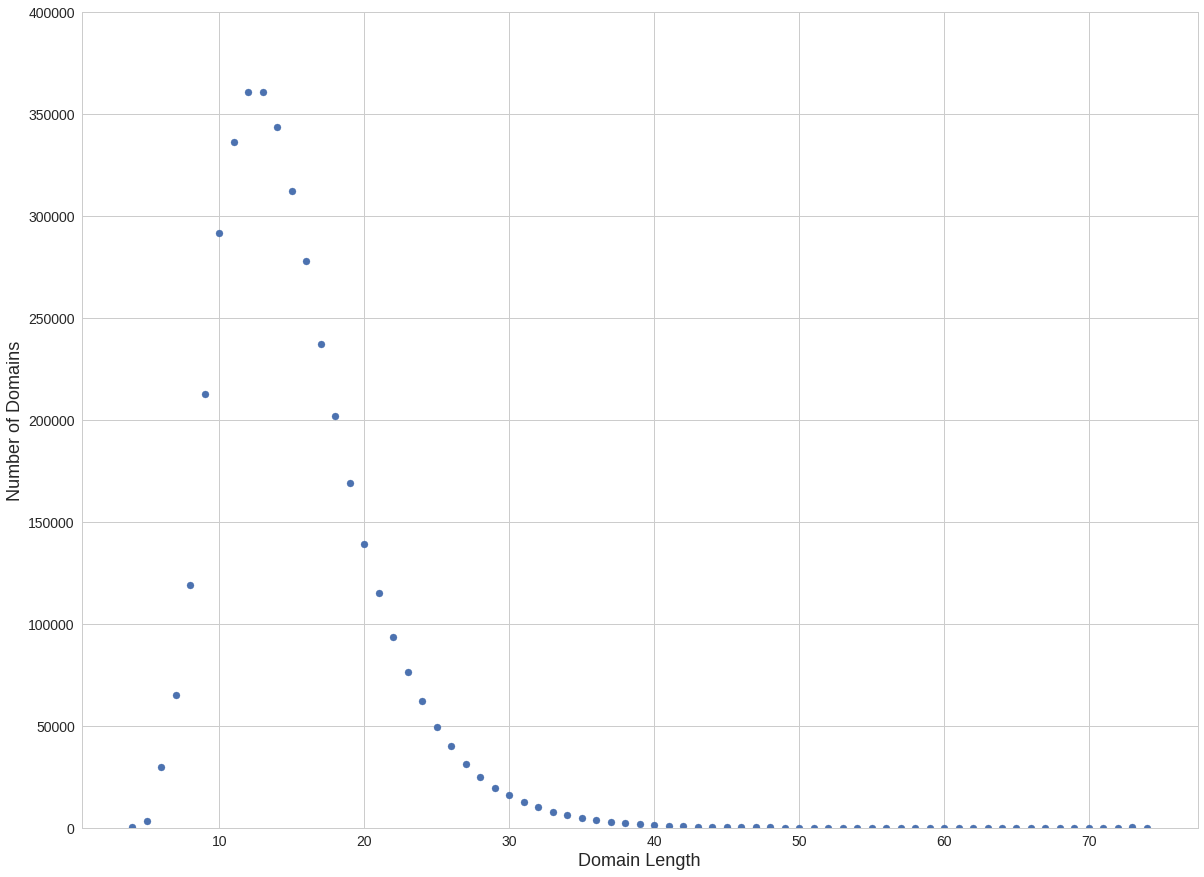

In [11]:
fig, ax = plt.subplots(figsize=(20, 15))
plt.rcParams.update({'font.size': 18})
ax.set_xlabel('Domain Length')
ax.set_ylabel('Number of Domains')
ax.set_ylim([0,400000])
ax.scatter(df_domain_len_dist['domain_length'], df_domain_len_dist['count'])

## Plot Correlations

Next, we try to determine if there are ny correlation between certain features extracted from domain names and the average Alexa ranking. The data used in this notebook is generated by this [script](https://github.com/sheikhomar/mako/blob/master/src/data/spark/domain_features.py).

In [12]:
data_path = '../data/external/combined-features.csv'
df_features = pd.read_csv(data_path, names=['length', 'dot_count', 'digit_ratio', 'vowel_ratio', 'entropy', 'ideal_entropy', 'is_gtld', 'avg_ranking'])
df_features.head()

,length,dot_count,digit_ratio,vowel_ratio,entropy,ideal_entropy,is_gtld,avg_ranking
0,12,0,1,0,2.405639,3.000000,1,46337
1,14,0,3,3,3.121928,3.321928,1,64946
2,10,0,6,6,2.584963,2.584963,1,83686
3,15,0,11,5,3.459432,3.459432,1,79201
4,10,0,2,6,2.584963,2.584963,1,5283


We know that `is_gtld` is a Boolean feature, so we need to mark it as such.

In [13]:
df_features['is_gtld'] = df_features['is_gtld'].astype('category')

For a binary feature, we use Point-Biserial to compute correlation.

In [14]:
from scipy import stats
stats.pointbiserialr(df_features['is_gtld'], df_features['avg_ranking'])

PointbiserialrResult(correlation=-0.030168018167854031, pvalue=2.7043643975384784e-22)

There is a slight negative correlation between gTLD and ranking. Now, let us check if there are correlation between each of the other numerical features.

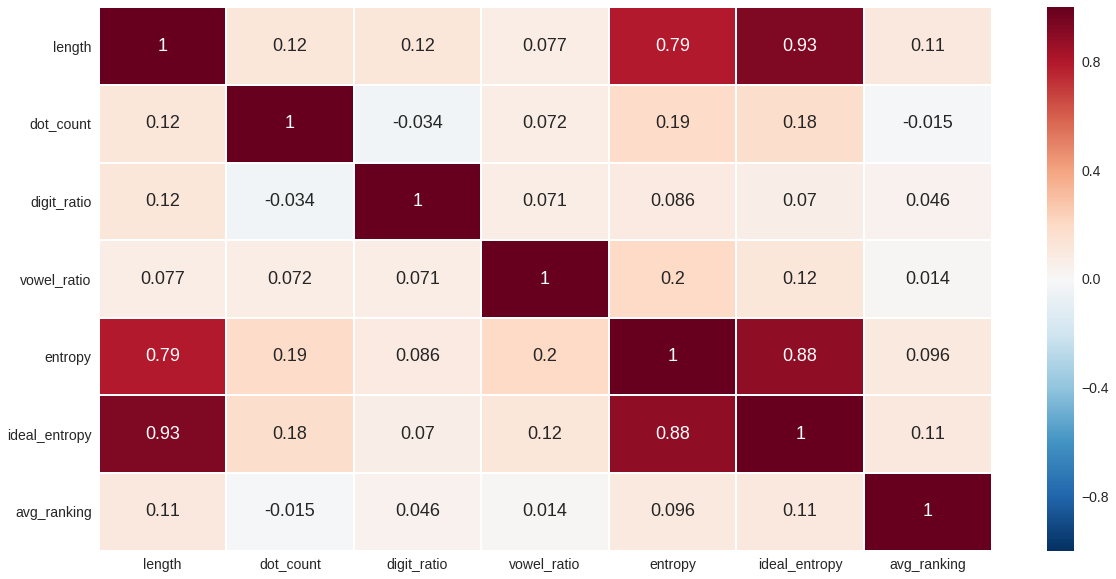

In [15]:
plt.figure(figsize = (20,10))
sns.heatmap(df_features.corr(), annot=True, linewidths=1)

As could be predicted, there are no strong correlations between the other features and the ranking.